# Insiders - All In One Place

## Cardio Catch Diseases ( CCD ) company

Cadio Catch Diseases is a company that specializes in detecting early-stage heart disease. Its business model is of the Service type, that is, the company offers the early diagnosis of a cardiovascular disease for a certain price.

Currently, the diagnosis of cardiovascular disease is made manually by a team of specialists. The current accuracy of the diagnosis varies between 55% and 65%, due to the complexity of the diagnosis and also the fatigue of the staff who take turns to minimize the risks. The cost of each diagnosis, including equipment and analysts' payroll, is around `R$1,000.00`.

The price of the diagnosis, paid by the client, varies according to the accuracy achieved by the specialists' time, the client pays `R$ 500.00` for each 5% accuracy above 50%. For example, for an accuracy of 55% the diagnosis costs the customer `$500.00`, for an accuracy of 60% the value is `$1000.00`, and so on. If the diagnostic accuracy for 50% of the customer does not pay for it.

Note that the variation in accuracy given by the time of specialists means that the company now has an operation with profit, revenue greater than the cost, or an operation with a loss, revenue less than the cost. This diagnostic instability causes the company to have an unpredictable Cashflow.

---

## Project Objectives

Your goal as the Data Scientist hired by Cardio Catch Diseases is to create a tool that increases diagnostic accuracy and that accuracy is stable for all diagnoses.

So your job as Data Scientist is to create a patient classification tool, like a stable accuracy. Along with the tool, you need to submit a report to the CEO of Cardio Catch Diseases reporting the results and answering the following questions: (He will likely ask these questions on the day of your presentation.)

1. What is the Accuracy and Precision of the tool?
2. How much profit will Cardio Catch Diseases have with the new tool?
3. How reliable is the result given by the new tool?

---

## Data

The dataset that will be used to create a solution for cardiovascular disease is available on the [Kaggle platform](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset).

This dataset contains 70,000 patient diagnoses. You will use this data to build your solution.

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.


Features:

* Age | Objective Feature | age | int (days)
* Height | Objective Feature | height | int (cm) |
* Weight | Objective Feature | weight | float (kg) |
* Gender | Objective Feature | gender | categorical code | 1: women, 2: men |
* Systolic blood pressure | Examination Feature | ap_hi | int |
* Diastolic blood pressure | Examination Feature | ap_lo | int |
* Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
* Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
* Smoking | Subjective Feature | smoke | binary |
* Alcohol intake | Subjective Feature | alco | binary |
* Physical activity | Subjective Feature | active | binary |
* Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

# Summary
* [1. Dataframe](#1.)
    * [1.1 Descriptive Statistics](#1.1)
    * [1.2 New Features](#1.2)
    * [1.3 Data Cleaning](#1.3)
* [2. Hypothesis](#2.)
    * [2.1 Risk Factors](#2.1)
    * [2.2 Hypothesis Creation](#2.2)
    * [2.3 Hypothesis Selection](#2.3)
* [3. Data Analysis](#3.)

# References
* [Cardiovascular disease](https://www.nhs.uk/conditions/cardiovascular-disease/)
* [9 doenças cardiovasculares comuns: sintomas, causas e tratamento](https://www.tuasaude.com/doencas-cardiovasculares/)
* [Understanding Your BMI Result](https://www.truthaboutweight.global/global/en/support/whats-your-body-mass-index-bmi.html?unit=metric&height=152&weight=34&bmi=14.72)

# Import libraries

In [124]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# other
import emoji

# 1. Dataframe <a class='anchor' id='1.'></a>

In [2]:
# removes the limit of max columns to be displayed in the notebook
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('csv/cardio_train.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# let's take a look at the general info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


* There is no missing values in this dataframe
* All features are numerics

# 1.1 Descriptive Statistics <a class='anchor' id='1.1'></a>

In [5]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Observations:
* The column age is in days. We can create a new column for the age of the client in years (int value)
* Create a new feature with the Body Mass Index (bmi) of the client (float value)
* Create a new feature that classifies the bmi result of the patient in | underweight, normal, overweight, obesity |
* Create a new feature that analyse the ap_hi and ap_lo to define if the client has hypertension | binary |
* There are some negative values in ap_hi and ap_lo columns, that shouldn't be negative --> Needs to analyse these cases
* There are some outliers in ap_hi and ap_lo columns --> Needs to analyse these cases
* The minimum weight is 10kg, but this is teoretically impossible --> Check this(these) row(s)

# 1.2 New Features <a class='anchor' id='1.2'></a>
* age_year: The age of the patient in years | int | years
* bmi: The Body Mass Index of the patient | float | kg/m²
* bmi_class: The classification of the patient based on the bmi value | 1: underweight, 2: normal, 3: overweight, 4: obesity |
* hypertension: The classification of the patient pressure level | binary | 0: normal, 1: hypertensive |

## 1.2.1 age_year

We will assume that every year has 365 days, so:

<p style='text-align:center'>$age\_year = \frac{age}{365}$</p>

Where:
* age is in days
* age_year only return the integer part of the fraction result

In [6]:
df['age_year'] = (df['age']/365).astype(int)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47


## 1.2.2 bmi

The Body Mass Index (BMI) is a weight-for-height index that classifies underweight, normal, overweight, and obesity in adults.

<p style='text-align:center'>$bmi = \frac{weight}{height²}$</p>

Where:
* weight is in kg
* height is in m

Reference: [Understanding Your BMI Result](https://www.truthaboutweight.global/global/en/support/whats-your-body-mass-index-bmi.html?unit=metric&height=152&weight=34&bmi=14.72)

In [7]:
df['bmi'] = round(df['weight']/((df['height']/100)**2), 2)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.01


## 1.2.3 bmi_class

The Body Mass Index (BMI) is a weight-for-height index that classifies underweight, overweight, and obesity in adults.

<img src="https://latex.codecogs.com/svg.image?bmi\_class&space;=&space;\begin{Bmatrix}underweight,&space;\,&space;if&space;\,&space;bmi&space;<&space;18.5&space;\\&space;normal,&space;\,&space;if&space;\,&space;18.5&space;\leq&space;bmi&space;<&space;25&space;\\&space;overweight,&space;\,&space;if&space;\,&space;25&space;\leq&space;bmi&space;<&space;30&space;\\&space;obesity,&space;\,&space;otherwise\end{Bmatrix}" title="bmi\_class = \begin{Bmatrix}underweight, \, if \, bmi < 18.5 \\ normal, \, if \, 18.5 \leq bmi < 25 \\ overweight, \, if \, 25 \leq bmi < 30 \\ obesity, \, otherwise\end{Bmatrix}" />

Reference: 
* [Understanding Your BMI Result](https://www.truthaboutweight.global/global/en/support/whats-your-body-mass-index-bmi.html?unit=metric&height=152&weight=34&bmi=14.72)
* [Equation Editor for online mathematics](https://latex.codecogs.com/)

In [8]:
df['bmi_class'] = [1 if x < 18.5 else 2 if x < 25 else 3 if x < 30 else 4 for x in df['bmi']]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi,bmi_class
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,2
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93,4
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.51,2
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71,3
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.01,2


## 1.2.4 hypertension

A person is classified as hypertensive if his/her systolic blood pressure is equal or higher than 140 mmHg or diastolic blood pressure is equal or higher than 90 mmHg.

<img src="https://latex.codecogs.com/svg.image?hypertension&space;=&space;\left\{\begin{matrix}1,\,&space;if\,ap\_hi&space;\geq&space;&space;140\,or\,ap\_lo&space;\geqslant&space;90&space;\\&space;0,\,&space;otherwise\end{matrix}\right." title="hypertension = \left\{\begin{matrix}1,\, if\,ap\_hi \geq 140\,or\,ap\_lo \geqslant 90 \\ 0,\, otherwise\end{matrix}\right." />


Reference: 
* [Understanding Your BMI Result](http://departamentos.cardiol.br/sbc-dha/profissional/pdf/Diretriz-HAS-2020.pdf) - Page 13 (528)
* [Equation Editor for online mathematics](https://latex.codecogs.com/)

In [9]:
df['hypertension'] = [1 if (x >= 140 or y >= 90) else 0 for x,y in zip(df['ap_hi'], df['ap_lo'])]
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi,bmi_class,hypertension
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,2,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93,4,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.51,2,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71,3,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.01,2,0


# 1.3 Data Cleaning <a class='anchor' id='1.3'></a>

## 1.3.1 Body Mass Index (bmi)

* According to the news from bbc, the bmi of 13.6 was the lowest the doctor has ever seen. So I will exclude all values that are lower than that, assuming that there was some kind of typo in height or weight measures
* According to the list of heaviest people from wikipedia, the highest bmi listed is 251.1. So I will exclude all values that are higher than that, assuming that there was some kind of typo in height or weight measures

Reference: 
* [Jordan Burling death: Teen had 'lowest BMI doctor had seen'](https://www.bbc.com/news/uk-england-leeds-44488822)
* [List of heaviest people](https://en.wikipedia.org/wiki/List_of_heaviest_people)

In [10]:
low_bmi = df[df['bmi'] < 13.6].index
len(df[df['bmi'] < 13.6])

12

In [11]:
high_bmi = df[df['bmi'] > 251.1].index
len(df[df['bmi'] > 251.1])

3

In [12]:
df.drop(low_bmi,inplace=True)
df.drop(high_bmi,inplace=True)
df.shape

(69985, 17)

15 entries were removed from the dataset

## 1.3.2 Systolic blood pressure (ap_hi)

* According to the post from quora, a very low value for systolic blood pressure is of 60 mmHg. So I will exclude all values that are lower than that, assuming that there was some kind of typo (this will handle all negative values for this column too)
* According to the news from science abc, the highest systolic blood pressure ever recorded was of 370 mmHg. So I will exclude all values that are higher than that, assuming that there was some kind of typo

Reference: 
* [What is the lowest blood pressure recorded on a living person?](https://www.quora.com/What-is-the-lowest-blood-pressure-recorded-on-a-living-person)
* [How High Can Blood Pressure Go?](https://www.scienceabc.com/eyeopeners/how-high-can-a-blood-pressure-go.html)

In [13]:
high_ap_hi = df[df['ap_hi'] > 370].index
len(df[df['ap_hi'] > 370])

39

In [14]:
low_ap_hi = df[df['ap_hi'] < 60].index
len(df[df['ap_hi'] < 60])

188

In [15]:
df.drop(high_ap_hi,inplace=True)
df.drop(low_ap_hi,inplace=True)
df.shape

(69758, 17)

227 entries were removed from the dataset

## 1.3.3 Diastolic blood pressure (ap_lo)

* We will use the lowest record from nature.com scientific report of 47 mmHg as the minimum acceptable value in the dataset
* According to the news from science abc, the highest diastolic blood pressure ever recorded was of 360 mmHg. So I will exclude all values that are higher than that, assuming that there was some kind of typo

Reference: 
* [Low on-treatment diastolic blood pressure and cardiovascular outcome: A post-hoc analysis using NHLBI SPRINT Research Materials](https://www.nature.com/articles/s41598-019-49557-4)
* [How High Can Blood Pressure Go?](https://www.scienceabc.com/eyeopeners/how-high-can-a-blood-pressure-go.html)

In [16]:
high_ap_lo = df[df['ap_lo'] > 360].index
len(df[df['ap_lo'] > 360])

949

In [17]:
low_ap_lo = df[df['ap_lo'] < 47].index
len(df[df['ap_lo'] < 47])

66

In [18]:
df.drop(high_ap_lo,inplace=True)
df.drop(low_ap_lo,inplace=True)
df.shape

(68743, 17)

1015 entries were removed from the dataset

# 2. Hypothesis <a class='anchor' id='2.'></a>

## 2.1 Risk Factors <a class='anchor' id='2.1'></a>

The exact cause of CVD isn't clear, but there are lots of things that can increase your risk of getting it. These are called "risk factors". The more risk factors you have, the greater your chances of developing CVD.

Below is a list  of the main risk factors for CVD.

1. High blood pressure (hypertension)
2. Smoking
3. High colesterol
4. Diabetes
5. Inactivity
6. Being overweight or obese
7. Family history of CVD
8. Ethnic Background
9. Age
10. Gender
11. Unhealthy Diet
12. Alcohol

Reference: [Cardiovascular disease](https://www.nhs.uk/conditions/cardiovascular-disease/)

## 2.2 Hypothesis Creation <a class='anchor' id='2.2'></a>

1. People with high blood pressure (hypertension) are more likely to have/develop CVD
2. People that smokes are more likely to have/develop CVD
3. People with high colesterol are more likely to have/develop CVD
4. People with high glucose levels (diabetes) are more likely to have/develop CVD
5. People that doesn't exercise regularly are more likely to have/develop CVD
6. People with higher Body Mass Index (overweight and obese) are more likely to have/develop CVD
7. People with family history of CVD are more likely to have/develop CVD than the ones that don't have
    * You're considered to have a family history of CVD if either:
        * your father or brother were diagnosed with CVD before they were 55
        * your mother or sister were diagnosed with CVD before they were 65
8. Older people are more likely to have/develop CVD
9. Men are more likely to have/develop CVD
10. People with unhealthy diet are more likely to have/develop CVD
11. People that drinks alcohol are more likely to have/develop CVD

## 2.3 Hypothesis Selection <a class='anchor' id='2.3'></a>

The hypothesis that can be validated through the analysis of the data that we have available are:

1. People with high blood pressure (hypertension) are more likely to have/develop CVD
2. People that smokes are more likely to have/develop CVD
3. People with high cholesterol are more likely to have/develop CVD
4. People with high glucose levels (diabetes) are more likely to have/develop CVD
5. People that doesn't exercise regularly are more likely to have/develop CVD
6. People with higher Body Mass Index (overweight and obese) are more likely to have/develop CVD
7. Older people are more likely to have/develop CVD
8. Men are more likely to have/develop CVD
9. People that drinks alcohol are more likely to have/develop CVD

# 3. Data Analysis <a class='anchor' id='3.'></a>

First, let's convert all categorical features into the categorical column type

In [19]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_year,bmi,bmi_class,hypertension
count,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000
mean,49976.064559,19464.368532,1.348777,164.366452,74.127994,126.616863,81.392724,1.364721,1.225972,0.087994,0.053635,0.803340,0.494843,52.828244,27.514667,2.876118,0.343846
std,28846.674403,2468.017400,0.476587,8.160895,14.309293,16.758202,9.655647,0.679009,0.571955,0.283289,0.225297,0.397476,0.499977,6.768876,5.808492,0.807386,0.474994
min,0.000000,10798.000000,1.000000,57.000000,28.000000,70.000000,49.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,13.760000,1.000000,0.000000
25%,25001.000000,17657.500000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.880000,2.000000,0.000000
50%,50020.000000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.350000,3.000000,0.000000
75%,74871.500000,21323.500000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.120000,4.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,240.000000,190.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,237.770000,4.000000,1.000000


In [20]:
cate_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bmi_class', 'hypertension', 'cardio']
df[cate_cols] = df[cate_cols].astype('category')
df.describe()

,id,age,height,weight,ap_hi,ap_lo,age_year,bmi
count,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000,68743.000000
mean,49976.064559,19464.368532,164.366452,74.127994,126.616863,81.392724,52.828244,27.514667
std,28846.674403,2468.017400,8.160895,14.309293,16.758202,9.655647,6.768876,5.808492
min,0.000000,10798.000000,57.000000,28.000000,70.000000,49.000000,29.000000,13.760000
25%,25001.000000,17657.500000,159.000000,65.000000,120.000000,80.000000,48.000000,23.880000
50%,50020.000000,19701.000000,165.000000,72.000000,120.000000,80.000000,53.000000,26.350000
75%,74871.500000,21323.500000,170.000000,82.000000,140.000000,90.000000,58.000000,30.120000
max,99999.000000,23713.000000,250.000000,200.000000,240.000000,190.000000,64.000000,237.770000


## 3.1 Numeric Features <a class='anchor' id='3.1'></a>

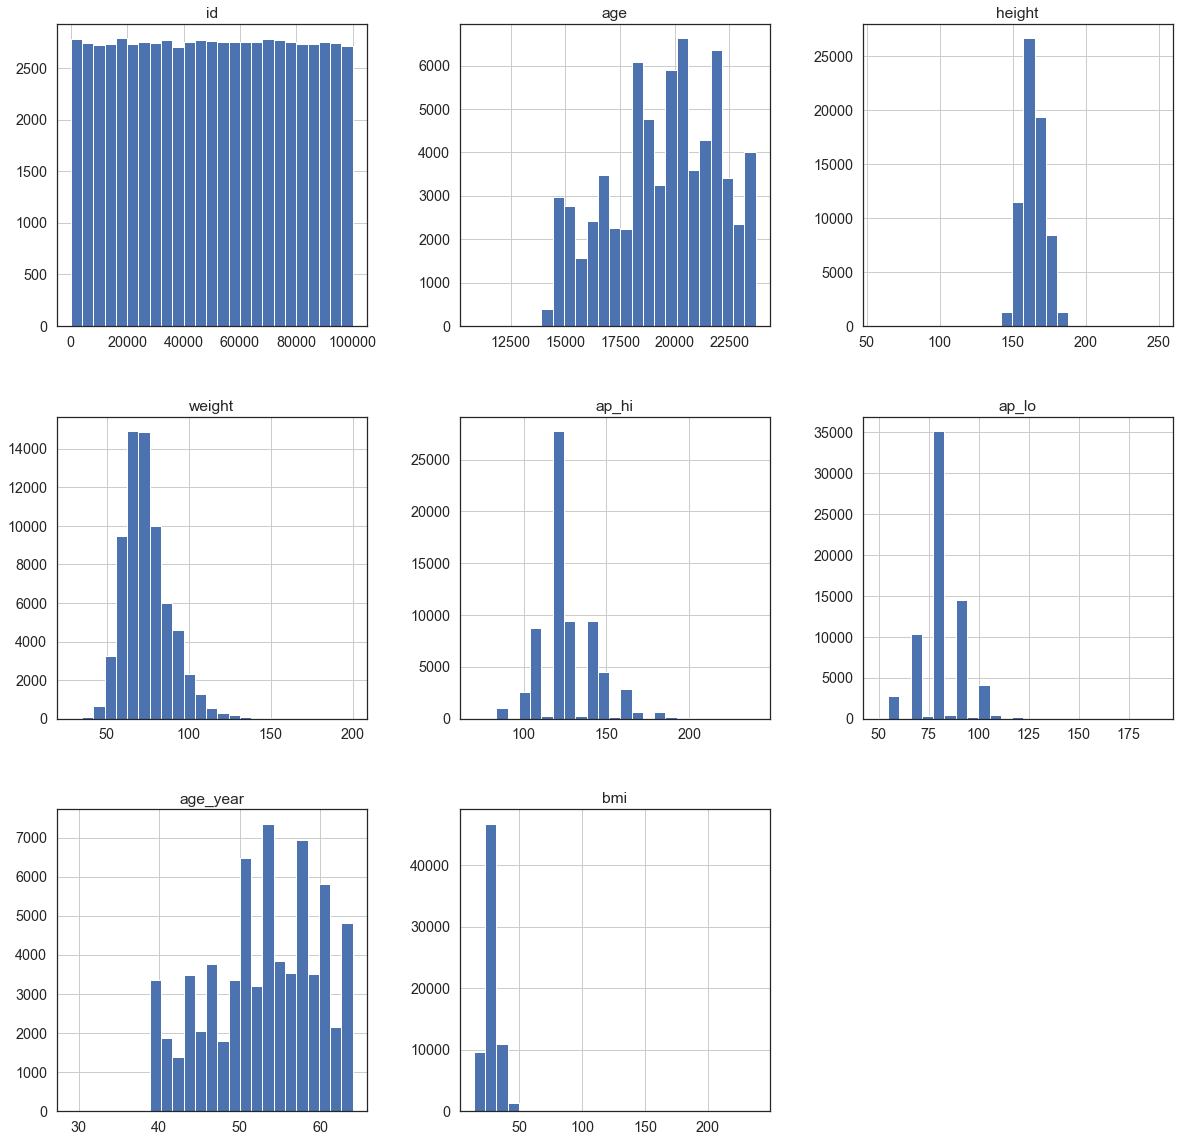

In [21]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=df.hist(bins=25)

## 3.2 Categorical Features <a class='anchor' id='3.2'></a>

In [24]:
df.describe(include=['category'])

,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi_class,hypertension
count,68743,68743,68743,68743,68743,68743,68743,68743,68743
unique,2,3,3,2,2,2,2,4,2
top,1,1,1,0,0,1,0,2,0
freq,44767,51554,58441,62694,65056,55224,34726,25316,45106


In [25]:
df[cate_cols] = df[cate_cols].astype(int)
cate_cols_plot = cate_cols[:8]
cate_cols_plot

['gender',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'bmi_class',
 'hypertension']

In [26]:
# define all categorical labels according to the respective int value
cate_labels = {}
cate_labels['gender'] = {1: 'women', 2: 'men'}
cate_labels['cholesterol'] = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
cate_labels['gluc'] = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
cate_labels['smoke'] = {0: 'no smoke', 1: 'smoke'}
cate_labels['alco'] = {0: "no alcohol", 1: 'alcohol'}
cate_labels['active'] = {0: 'no exercise', 1: 'exercise'}
cate_labels['bmi_class'] = {1: 'underweight', 2: 'normal', 3: 'overweight', 4: 'obesity'}
cate_labels['hypertension'] = {0: 'no hypertension', 1: 'hypertension'}
cate_labels['cardio'] = {0: 'no disease', 1: 'cardio disease'}

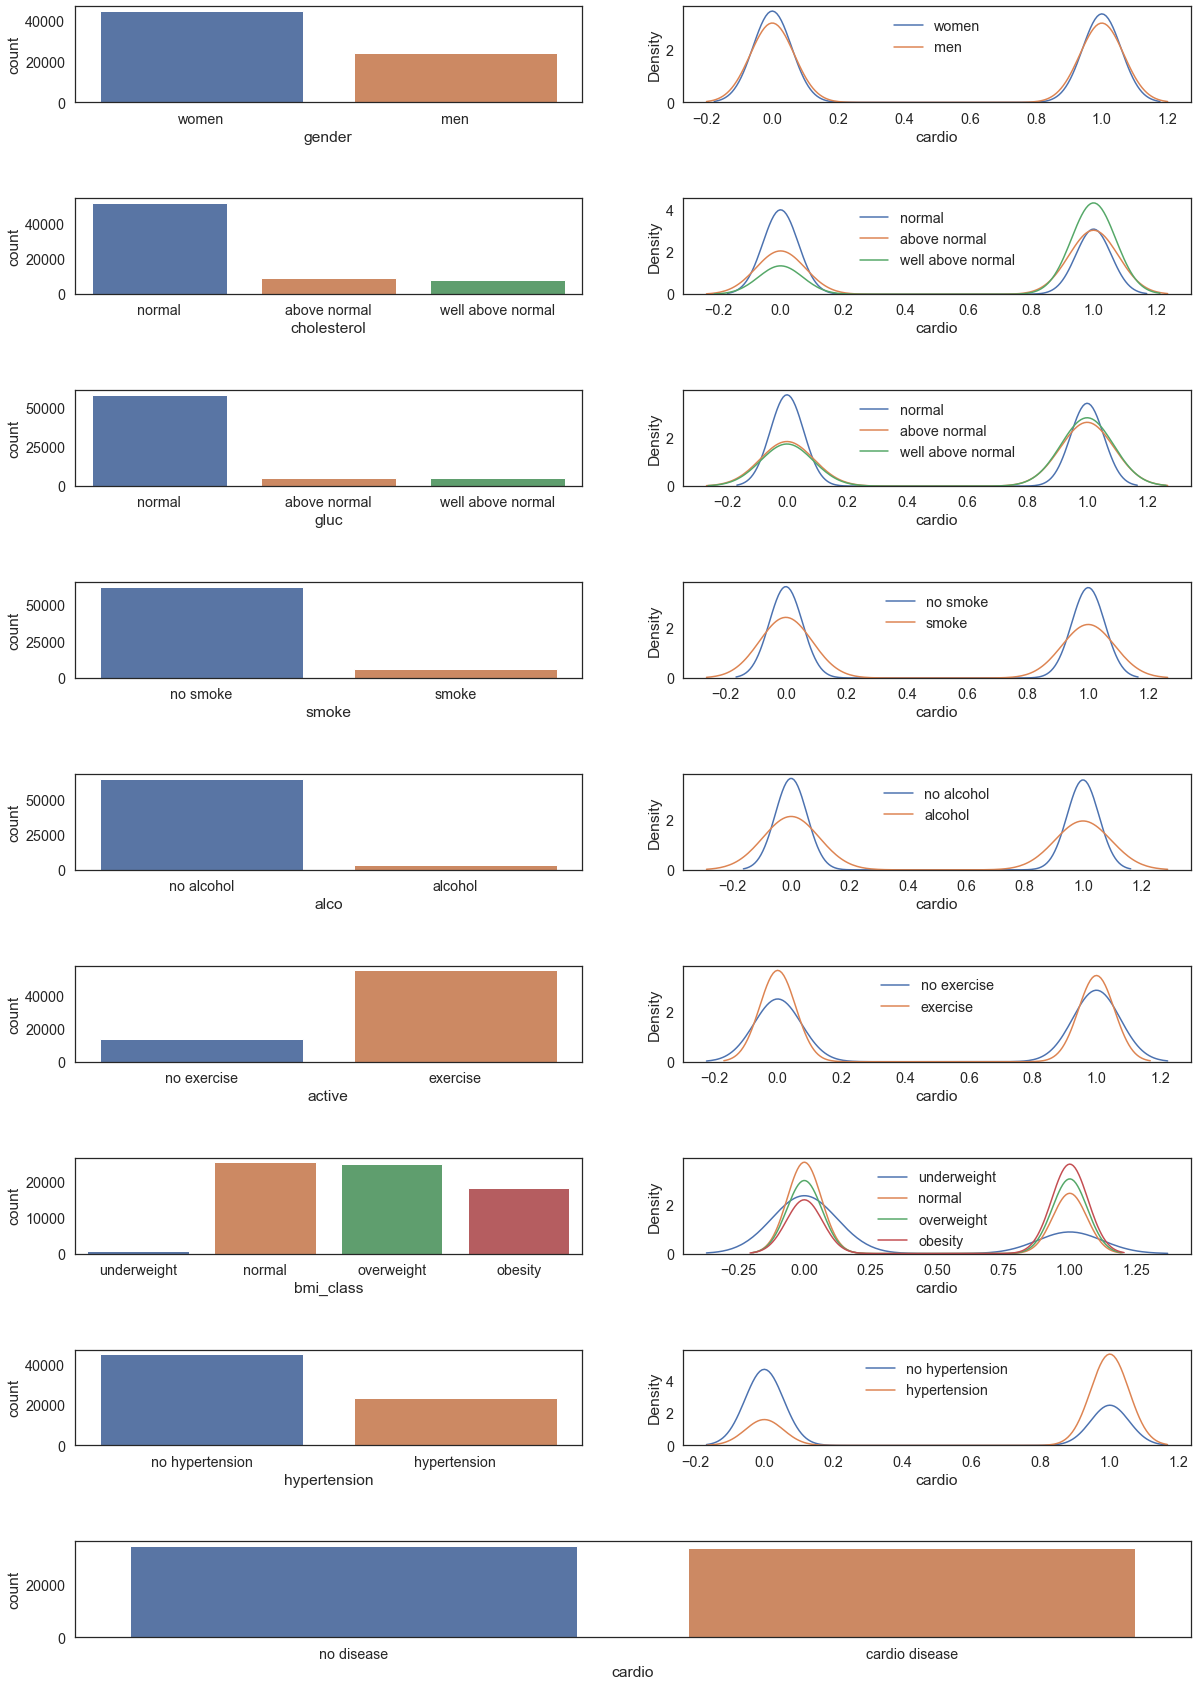

In [27]:
plt.figure(figsize=(20,30))
subplot_num = 0
# run a for loop to generate plots for all columns
for col_num, col in enumerate(cate_cols):
    subplot_num += 1
    
    if col == 'cardio':
        # create the count plots
        plt.subplot(9, 2, (subplot_num, subplot_num+1))
        sns.countplot(x=col, data=df)
        plt.xticks(range(len(df[col].unique())), list(cate_labels[col].values()))
    else:
        # create the count plots
        plt.subplot(9, 2, subplot_num)
        sns.countplot(x=col, data=df)
        plt.xticks(range(len(df[col].unique())), list(cate_labels[col].values()))

        subplot_num += 1

        # create the density plots
        plt.subplot(9, 2, subplot_num)
        for unique in sorted(df[col].unique()):
            sns.kdeplot(df[df[col] == unique]['cardio'], label=cate_labels[col][unique], fill=False)
            plt.legend(loc=9, framealpha=0.0)

plt.subplots_adjust(hspace=1)
plt.show()

## 3.3 Hypothesis Check <a class='anchor' id='3.3'></a>

In [58]:
def add_value_labels(ax, orientation, xspace=0, yspace=0, percentage=False):
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        if orientation == 'v':
            y_value = rect.get_height()
            x_value = rect.get_x() + rect.get_width() / 2
            label = rect.get_height()
        elif orientation == 'h':
            y_value = rect.get_y() + rect.get_height() / 4
            x_value = rect.get_width()
            label = rect.get_width()            

        # Vertical alignment for positive values
        va = 'bottom'

        # Define the label format
        if percentage==True:
            label = "{:.1f}".format(label*100)
        else:
            label = "{:,.0f}".format(label)

        # Create annotation
        ax.annotate(
            label,                     
            (x_value, y_value),        
            xytext=(xspace, yspace),   
            textcoords="offset points",
            ha='center',               
            va=va)                     

In [97]:
def plot_hist(df, field, subplot=(1,2,1), hist_type='normal'):   
    # create the subplot figure
    ax = plt.subplot(subplot[0], subplot[1], subplot[2])
    
    # create the bar plots
    if hist_type == 'normal':
        image = 'images/' + field + '_Bar'
        title = 'Patients by {}'.format(field)
        ax.hist(df[field])
    elif hist_type == 'cardio':
        image = 'images/' + field + '_Bar_Cardio'
        title = 'Cardio disease patients by {}'.format(field)
        ax.hist(df[df['cardio'] == 1][field])
    elif hist_type == 'no_cardio':
        image = 'images/' + field + '_Bar_No_Cardio'
        title = 'No disease patients by {}'.format(field)
        ax.hist(df[df['cardio'] == 0][field])
    
    # define chart features
    ax.set_title(title, fontweight='bold',size=15)
    
    #plt.savefig(image)

In [75]:
def plot_percent_category(df, field, xvalues, subplot=(1,2,1), cardio_ratio=False, xticks=None, xspace=0, yspace=0, labels=True):
    # create the lists of values
    total = []
    no_cardio = []
    cardio = []
    
    # initially define the lists elements
    total_values = df[field].value_counts().sort_index()
    no_cardio_values = df[df['cardio'] == 0][field].value_counts()
    cardio_values = df[df['cardio'] == 1][field].value_counts()
    
    if xticks == None:
        xticks = xvalues
    
    # redefine lists elements, including 0 for no values for determined index
    for value in xvalues:
        if value in total_values.index:
            total.append(total_values[value])
        else:
            total.append(0)
            
        if value in no_cardio_values.index:
            no_cardio.append(no_cardio_values[value])
        else:
            no_cardio.append(0)
        
        if value in cardio_values.index:
            cardio.append(cardio_values[value])
        else:
            cardio.append(0)

    # create the subplot figure
    ax = plt.subplot(subplot[0], subplot[1], subplot[2])
    w = 1
    folds = np.linspace(5,len(xvalues)*5, len(xvalues))
    
    # create the bar plots
    if cardio_ratio == False:
        image = 'images/' + field + '_Bar'
        title = 'Customer by {} and cardio ratio'.format(field)
        ax.bar([element - w/2 for element in folds], [number if sum(total) == 0 else number / sum(total) for number in cardio], width=w, color='red', alpha=0.85)
        ax.bar([element + w/2 for element in folds], [number if sum(total) == 0 else number / sum(total) for number in no_cardio], width=w, color='darkgrey', alpha=0.85)
    else:
        image = 'images/' + field + '_Bar_Compliance'
        title = 'Cardio by {}'.format(field)
        ax.bar([element - w/2 for element in folds], [number if total == 0 else number / total for number, total in zip(cardio, total)], width=w, color='red', alpha=0.85)
        ax.bar([element + w/2 for element in folds], [number if total == 0 else number / total for number, total in zip(no_cardio, total)], width=w, color='darkgrey', alpha=0.85)
        
    # define if the value labels must appear in chart
    if labels == True:
        add_value_labels(ax, orientation='v', percentage=True, xspace=xspace)
        
    # set the y axis as percentage
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    # define chart features
    ax.set_xticks(folds)
    ax.set_xticklabels(xticks)
    ax.set_title(title, fontweight='bold',size=15)
    
    #plt.savefig(image)

In [117]:
def plot_line_percent_category(df, field, xvalues, subplot=(1,1,1), cardio_ratio=False):    
    total = []
    no_cardio = []
    cardio = []
    
    total_values = df[field].value_counts().sort_index()
    no_cardio_values = df[df['cardio'] == 0][field].value_counts()
    cardio_values = df[df['cardio'] == 1][field].value_counts()
        
    for value in xvalues:
        if value in total_values.index:
            total.append(total_values[value])
        else:
            total.append(0)
            
        if value in no_cardio_values.index:
            no_cardio.append(no_cardio_values[value])
        else:
            no_cardio.append(0)
        
        if value in cardio_values.index:
            cardio.append(cardio_values[value])
        else:
            cardio.append(0)

    ax = plt.subplot(subplot[0], subplot[1], subplot[2])
    
    if cardio_ratio == False:
        image = 'images/' + field + '_Bar'
        title = 'Customer by {} and cardio ratio'.format(field)
        ax.plot(xvalues, [number if sum(total) == 0 else number / sum(total) for number in cardio], '-r')
        ax.plot(xvalues, [number if sum(total) == 0 else number / sum(total) for number in no_cardio], '-b')
    else:
        image = 'images/' + field + '_Bar_Compliance'
        title = 'Cardio by {}'.format(field)
        ax.plot(xvalues, [number if total == 0 else number / total for number, total in zip(cardio, total)], '-r')
        ax.plot(xvalues, [number if total == 0 else number / total for number, total in zip(no_cardio, total)], '-b')
        
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.title(title, fontweight='bold',size=15)
    #plt.savefig(image)

In [31]:
def plot_pie(df, field, subplot=(1,2,1), cardio_ratio=False, order=None, size=(16,8), pct=0.75, startangle=0, pct_pos={}):
    # Define if only the respondent customers will be considered
    if cardio_ratio == False:
        image = 'images/' + field + '_Pie'
        entries = df[field].value_counts()
        title = 'Customers by {}'.format(field)
    else:
        image = 'images/' + field + '_Pie_Cardio'
        entries = df[df['cardio'] == 1][field].value_counts()
        title = 'Cardio customers by {}'.format(field)
    
    # Define if there is an exact order of values to be plotted
    if order == None:
        cardio = list(entries)
    else:
        cardio = []
        for value in order[::-1]:
            if value in entries.index:
                cardio.append(entries[value])
        cardio = cardio[::-1]
    
    # Set the figure parameters
    sns.set(style='white',font_scale=1.1, rc={'figure.figsize':size})

    # Create pie chart
    ax = plt.subplot(subplot[0], subplot[1], subplot[2])
    plt.title(title, fontweight='bold',size=15)
    _, _, autopcts = ax.pie(cardio, autopct='%1.1f%%', pctdistance=pct, startangle=startangle)
    plt.setp(autopcts, **{'fontsize':15, 'fontweight': 'bold'})
    
    # Adjust pct positions
    for key, value in pct_pos.items():
        pct = autopcts[key]
        d=1
        xi,yi = pct.get_position()
        ri = np.sqrt(xi**2+yi**2)
        phi = np.arctan2(yi,xi)
        x = d*ri*np.cos(phi)+value[0]
        y = d*ri*np.sin(phi)+value[1]
        pct.set_position((x,y))

    #plt.savefig(image)

In [1]:
def generate_num_chart_dashboard(df, field, order, size=(20,15), line_legend_pos=(0.05,1.15)):
    plt.figure(figsize=size)
    plot_hist(df, field, subplot=(2,2,1), hist_type='no_cardio')
    plot_hist(df, field, subplot=(2,2,2), hist_type='cardio')
    plot_line_percent_category(df, field, order, subplot=(2,2,3))
    plot_line_percent_category(df, field, order, subplot=(2,2,4), cardio_ratio=True)
    plt.legend(['Cardio disease', 'No disease'], bbox_to_anchor=line_legend_pos, framealpha=0.0, prop={'size': 12})
    plt.show()

In [33]:
def generate_cate_chart_dashboard(df, field, order, ticks, size=(20,15), pct=1.15, pie_legend_pos=(-0.15, 0.95), bar_legend_pos=(0.05,1.15)):
    plt.figure(figsize=size)
    plot_pie(df, field, subplot=(2,2,1), order=order, pct=pct)
    plot_pie(df, field, subplot=(2,2,2), cardio_ratio=True, order=order, pct=pct)
    plt.legend(ticks, bbox_to_anchor=pie_legend_pos, framealpha=0.0, prop={'size': 12})
    plot_percent_category(df, field, order, subplot=(2,2,3), xticks=ticks)
    plot_percent_category(df, field, order, subplot=(2,2,4), xticks=ticks, cardio_ratio=True)
    plt.legend(['Cardio disease', 'No disease'], bbox_to_anchor=bar_legend_pos, framealpha=0.0, prop={'size': 12})
    plt.show()

### 3.3.1 Hypothesis 1: People with high blood pressure (hypertension) are more likely to have/develop CVD

<b>TRUE: High relevance</b>

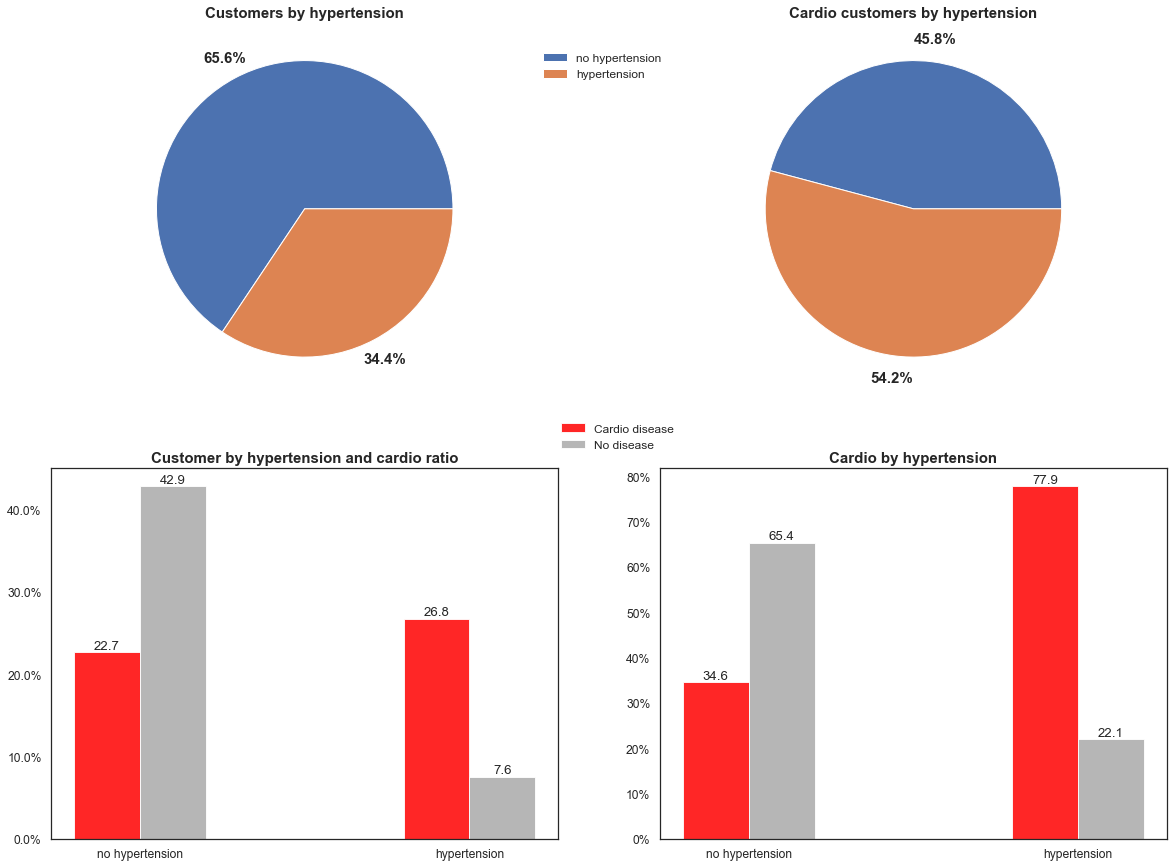

In [76]:
hypertension_ticks = list(cate_labels['hypertension'].values())
order=[0,1]
generate_cate_chart_dashboard(df, 'hypertension', order, hypertension_ticks)

* There are more patients without hypertension (65.6%)
* Among all patients that have a CVD, the majority are people with hypertension (54.2%)
* The majority of people, that doesn't have hypertension, doesn't have a CVD
* The majority of people, that has hypertension, has a CVD
* The percentage of people, that have a CVD, increases from people without hypertension to people with hypertension

### 3.3.2 Hypothesis 2: People that smokes are more likely to have/develop CVD

<b>FALSE: Low relevance</b>

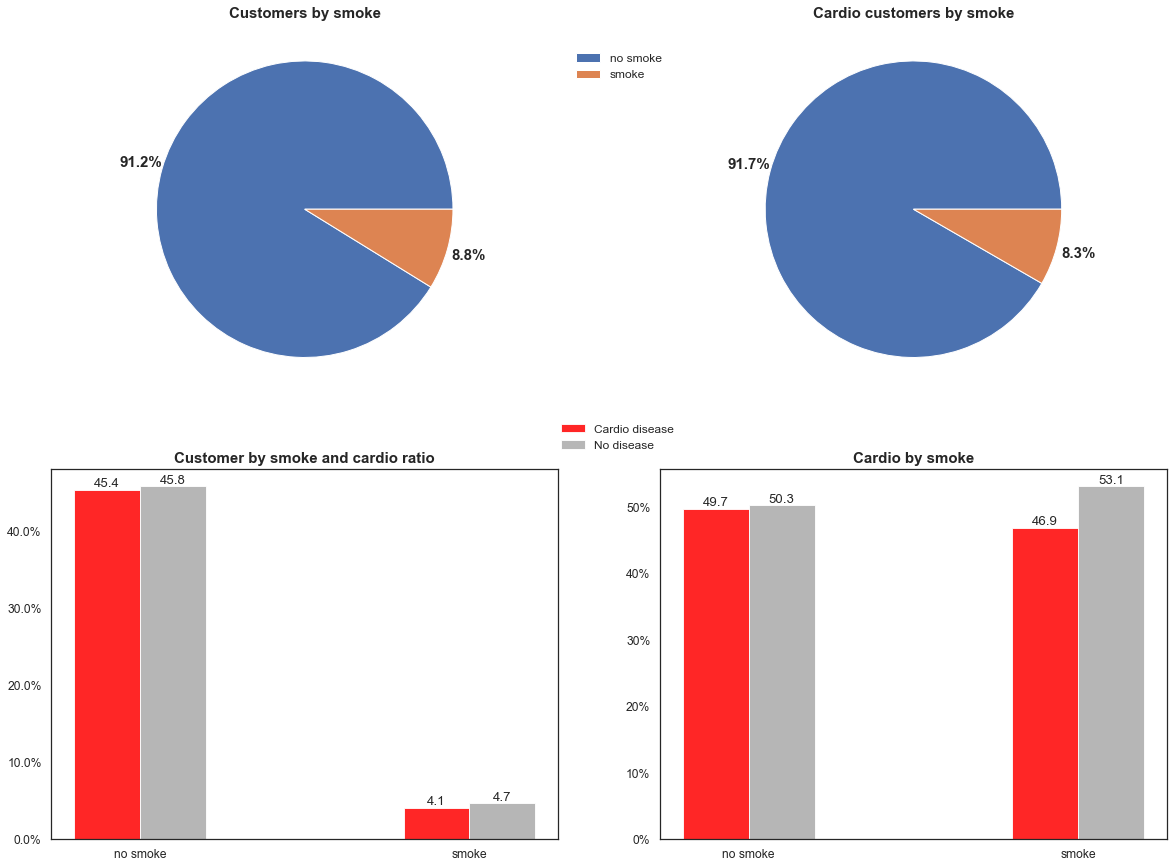

In [77]:
smoke_ticks = list(cate_labels['smoke'].values())
order=[0,1]
generate_cate_chart_dashboard(df, 'smoke', order, smoke_ticks)

* There are more patients that doesn't smoke (91.2%)
* Among all patients that have a CVD, the majority are people that doesn't smoke (91.7%)
* The majority of people, that doesn't smoke, doesn't have a CVD
* The majority of people, that smokes, doesn't have a CVD
* The percentage of people, that have a CVD, decreases almost nothing from people that doesn't smoke to people that smokes

### 3.3.3 Hypothesis 3: People with high cholesterol are more likely to have/develop CVD

<b>TRUE: High relevance</b>

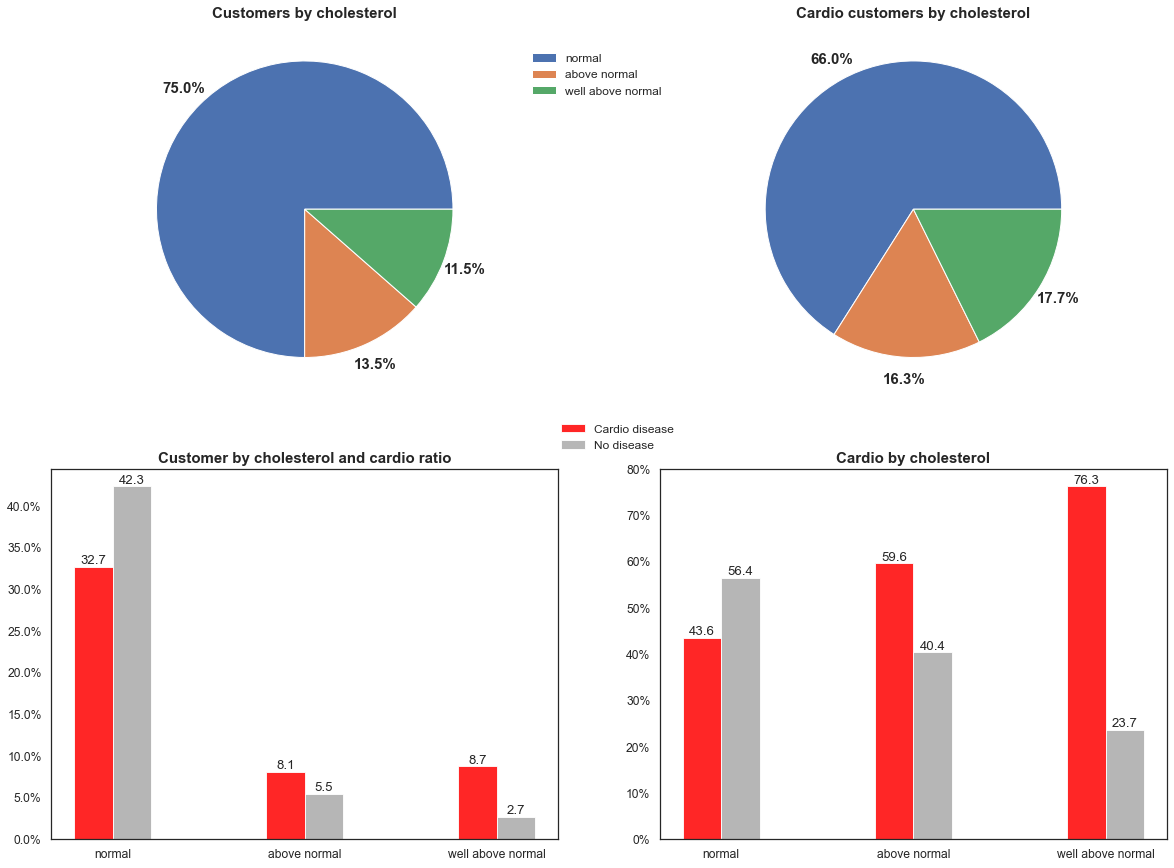

In [78]:
cholesterol_ticks = list(cate_labels['cholesterol'].values())
order=[1,2,3]
generate_cate_chart_dashboard(df, 'cholesterol', order, cholesterol_ticks)

* There are more patients with normal level of cholesterol (75.0%)
* Among all patients that have a CVD, the majority are peoplewith normal level of cholesterol (66.0%)
* The majority of people with normal level of cholesterol doesn't have a CVD
* The majority of people with high level of cholesterol (above and well above normal) has a CVD
* The percentage of people, that have a CVD, increases as the level of cholesterol increases

### 3.3.4 Hypothesis 4: People with high glucose levels (diabetes) are more likely to have/develop CVD

<b>TRUE: Medium relevance</b>

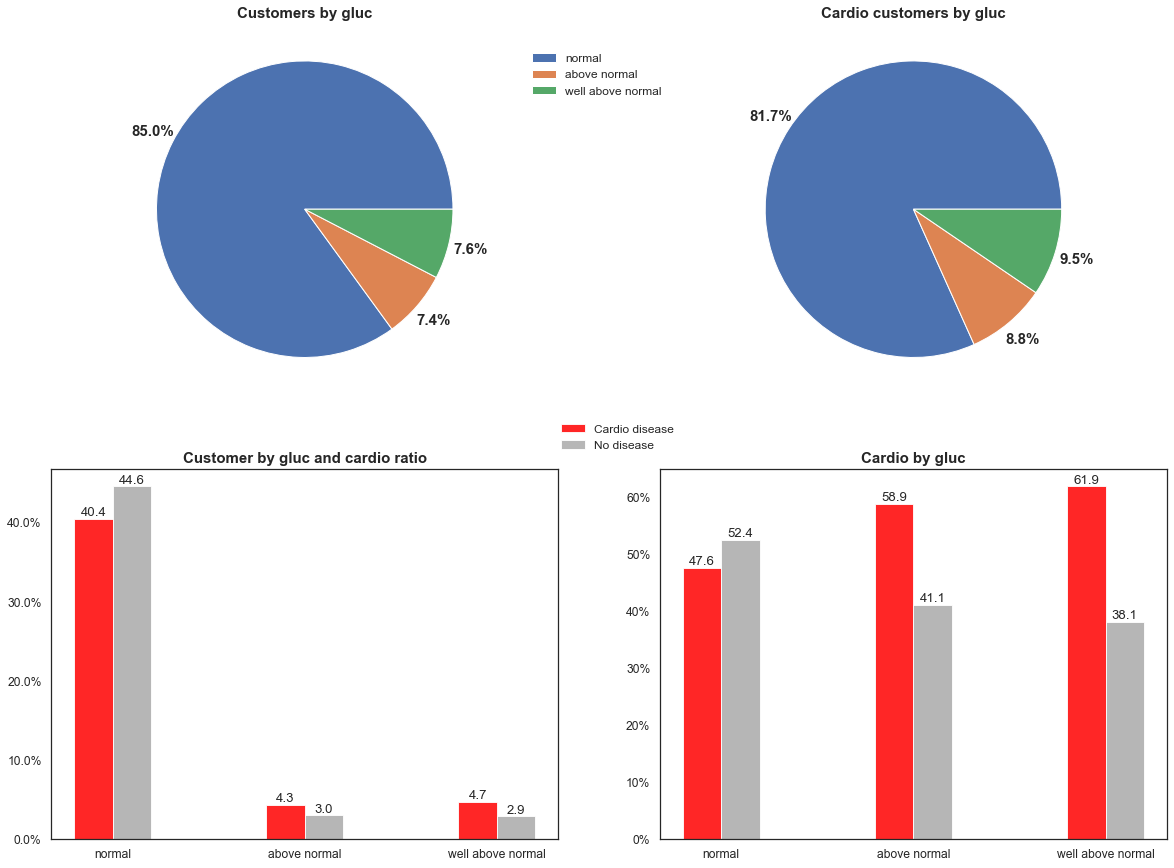

In [79]:
gluc_ticks = list(cate_labels['gluc'].values())
order=[1,2,3]
generate_cate_chart_dashboard(df, 'gluc', order, gluc_ticks)

* There are more patients with normal level of glucose (85.0%)
* Among all patients that have a CVD, the majority are people with normal level of glucose (81.7%)
* The majority of people with normal level of glucose doesn't have a CVD
* The majority of people with high level of glucose (above and well above normal) has a CVD
* The percentage of people, that have a CVD, increases as the level of glucose increases

### 3.3.5 Hypothesis 5: People that doesn't exercise regularly are more likely to have/develop CVD

<b>TRUE: Low relevance</b>

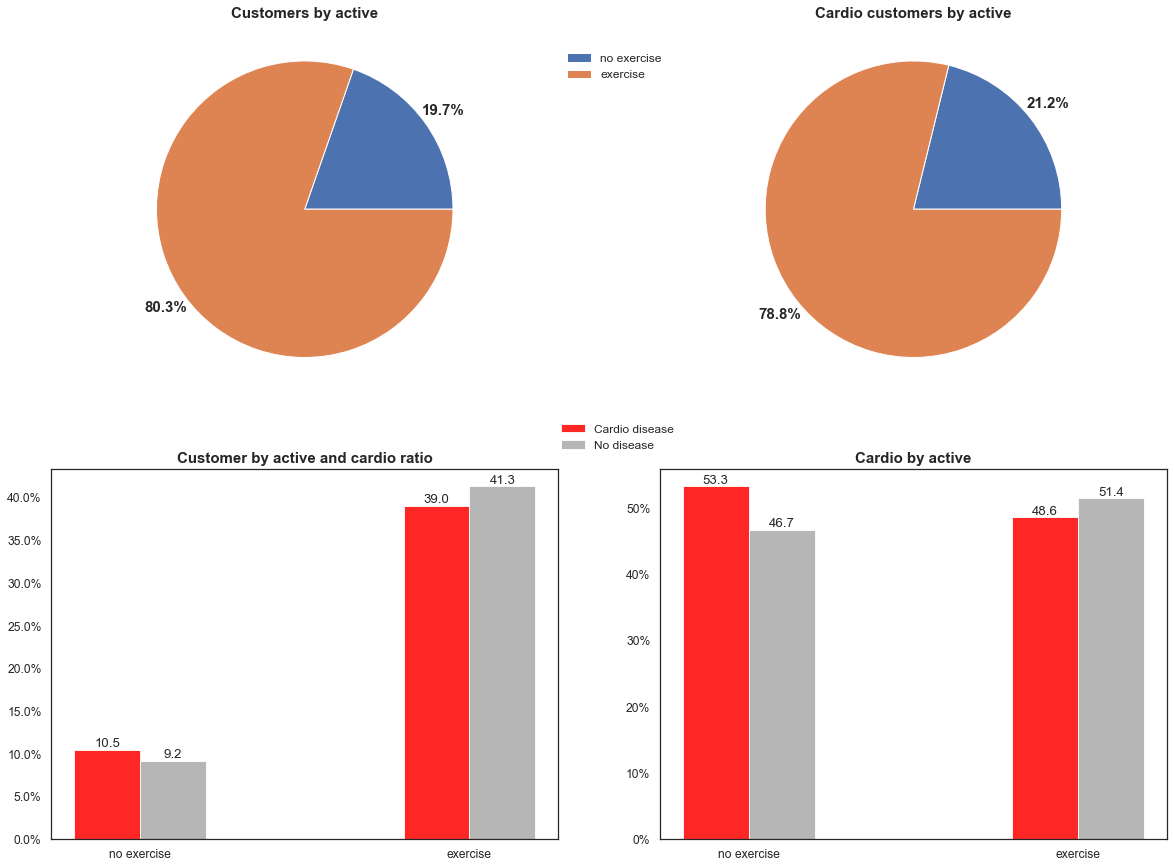

In [80]:
active_ticks = list(cate_labels['active'].values())
order=[0,1]
generate_cate_chart_dashboard(df, 'active', order, active_ticks)

* There are more patients that exercises (80.3%)
* Among all patients that have a CVD, the majority are people that exercises (78.8%)
* The majority of people, that doesn't exercise, has a CVD
* The majority of people, that exercises, doesn't have a CVD
* The percentage of people, that have a CVD, decreases a little from people that doesn't exercise to people that exercises

### 3.3.6 Hypothesis 6: People with higher Body Mass Index (overweight and obese) are more likely to have/develop CVD

<b>TRUE: High relevance</b>

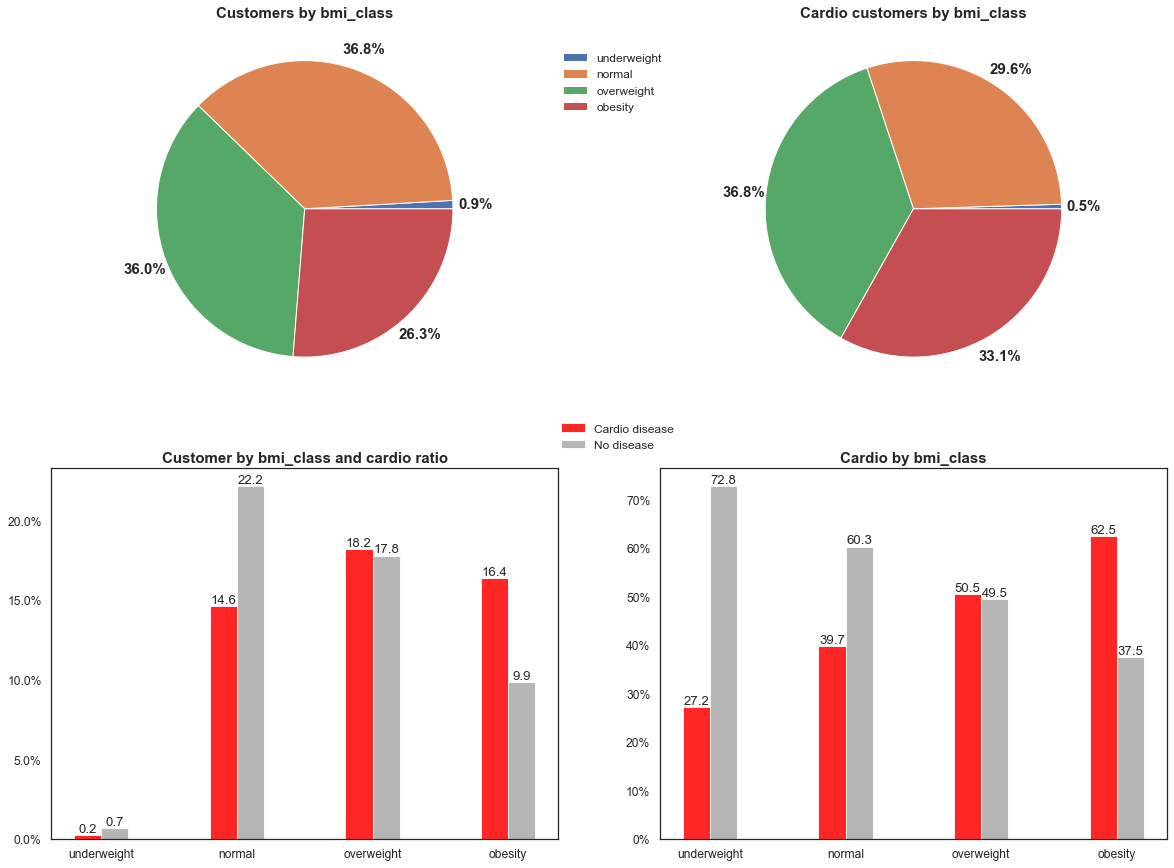

In [82]:
bmi_class_ticks = list(cate_labels['bmi_class'].values())
order=[1,2,3,4]
generate_cate_chart_dashboard(df, 'bmi_class', order, bmi_class_ticks)

* There are more patients with normal bmi (36.8%)
* Among all patients that have a CVD, the majority are overweighted people (36.8%), followed by obese people (33.1%)
* The majority of underweighted and normal bmi people doesn't have a CVD
* The majority of overweighted and obese people has a CVD
* The percentage of people, that have a CVD, increases as the bmi increases

### 3.3.7 Hypothesis 7: Older people are more likely to have/develop CVD

<b>TRUE: High relevance</b>

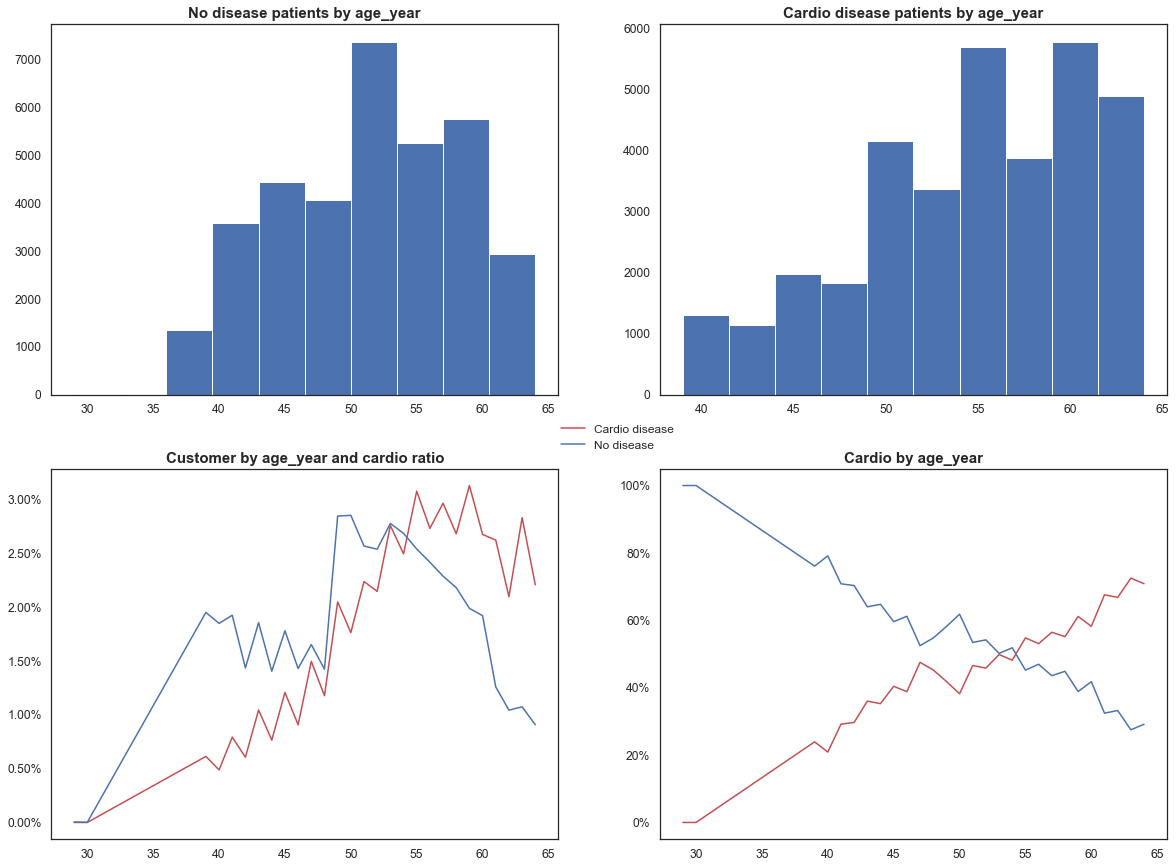

In [122]:
age_ticks = list(df['age_year'].value_counts().sort_index().index)
generate_num_chart_dashboard(df, 'age_year', age_ticks)

* There are more patients between 50 and 55 years old
* The distribution of people that have a CVD is similar to the distribution of all patients
* The majority of people, that has a CVD, are older than 50 years old
* The majority of people, that doesn't have a CVD, are between 49 and 55 years old
* The percentage of people, that have a CVD, increases as the age increases

### 3.3.8 Hypothesis 8: Men are more likely to have/develop CVD

<b>FALSE: Low relevance</b>

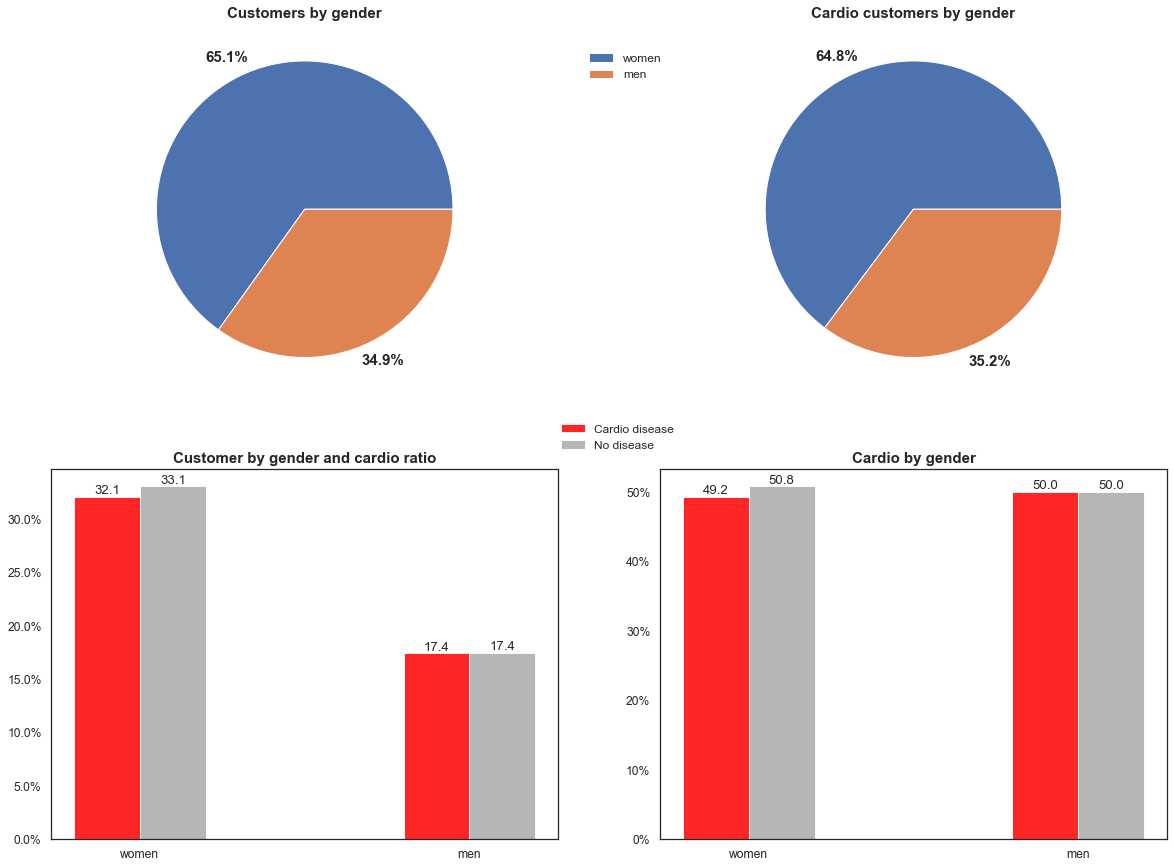

In [87]:
gender_ticks = list(cate_labels['gender'].values())
order=[1,2]
generate_cate_chart_dashboard(df, 'gender', order, gender_ticks)

* There are more female patients (65.1%)
* Among all patients that have a CVD, the majority are women (64.8%)
* The majority of women doesn't have a CVD
* Men have equal percentages of people with or without CVD
* The percentages of women and men, that have CVD, are around 50.0%

### 3.3.9 Hypothesis 9: People that drinks alcohol are more likely to have/develop CVD

<b>FALSE: Low relevance</b>

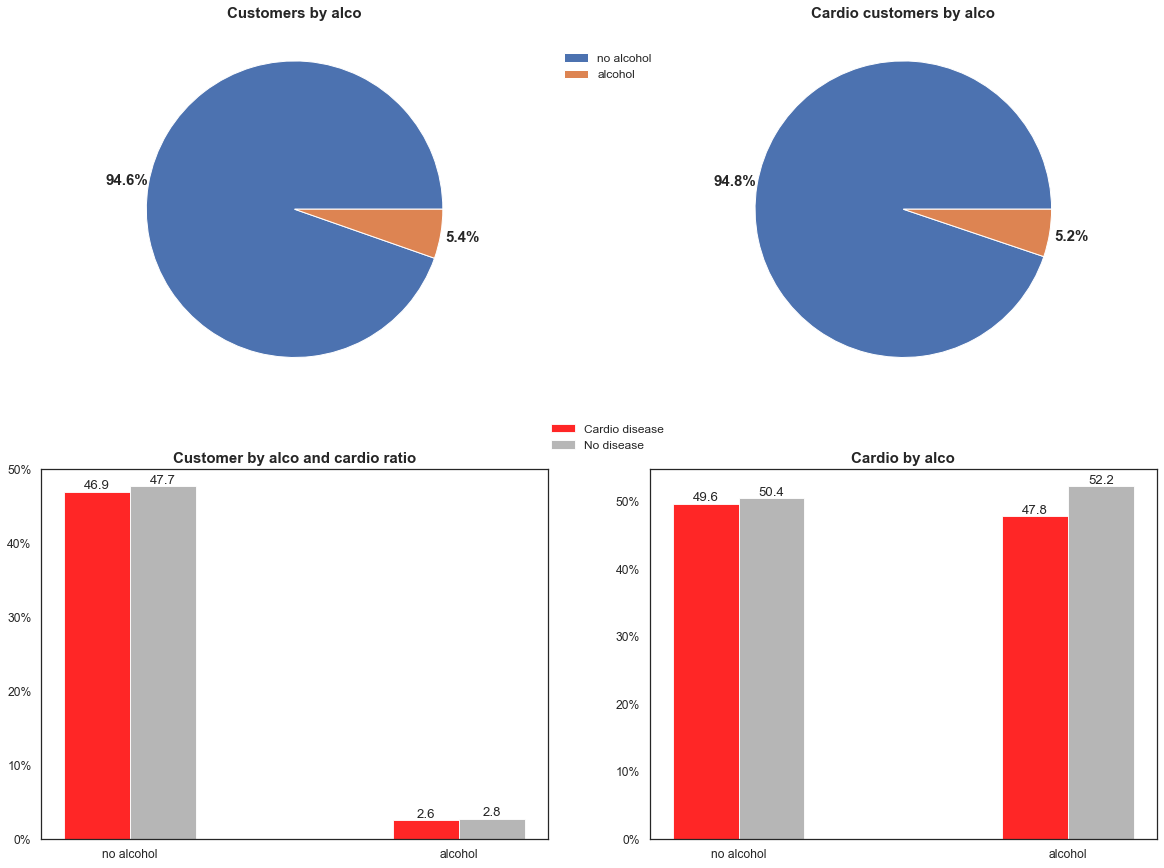

In [88]:
alco_ticks = list(cate_labels['alco'].values())
order=[0,1]
generate_cate_chart_dashboard(df, 'alco', order, alco_ticks)

* There are more patients that doesn't drink alcohol (94.6%)
* Among all patients that have a CVD, the majority are people that doesn't drink alcohol (94.8%)
* The majority of people, that doesn't drink alcohol, doesn't have a CVD
* The majority of people, that drinks alcohol, doesn't have a CVD
* The percentage of people, that have a CVD, decreases a little from people that doesn't drink alcohol to people that drinks alcohol

### 3.3.10 Hypothesis Overview

1. People with high blood pressure (hypertension) are more likely to have/develop CVD
2. People that smokes are more likely to have/develop CVD
3. People with high cholesterol are more likely to have/develop CVD
4. People with high glucose levels (diabetes) are more likely to have/develop CVD
5. People that doesn't exercise regularly are more likely to have/develop CVD
6. People with higher Body Mass Index (overweight and obese) are more likely to have/develop CVD
7. Older people are more likely to have/develop CVD
8. Men are more likely to have/develop CVD
9. People that drinks alcohol are more likely to have/develop CVD

In [135]:
hypothesis = {1: ':arrow_up: Blood Pressure : :arrow_up: CVD',
              2: 'Smoke : :arrow_up: CVD',
              3: ':arrow_up: Cholesterol : :arrow_up: CVD',
              4: ':arrow_up: Glucose : :arrow_up: CVD',
              5: 'No Exercise :arrow_up: CVD',
              6: ':arrow_up: Body Mass Index (BMI) : :arrow_up: CVD',
              7: ':arrow_up: Age : :arrow_up: CVD',
              8: 'Men :arrow_up: CVD',
              9: 'Drink Alcohol : :arrow_up: CVD'
             }

validation = [1,0,1,1,1,1,1,0,0]
validation = [':thumbsup:' if x==1 else ':x:' for x in validation]

relevance = [2,0,2,1,0,2,2,0,0]
relevance = ['High' if x==2 else 'Medium' if x == 1 else 'Low' for x in relevance]

df_hypothesis = pd.Series(hypothesis)
df_hypothesis = pd.DataFrame({'Hypothesis':df_hypothesis.index, 'Description': df_hypothesis.values})
df_hypothesis['Description'] = df_hypothesis['Description'].apply(lambda x: emoji.emojize(x, use_aliases=True))
df_hypothesis['Status'] = validation
df_hypothesis['Status'] = df_hypothesis['Status'].apply(lambda x: emoji.emojize(x, use_aliases=True))
df_hypothesis['Relevance'] = relevance
df_hypothesis.index = df_hypothesis['Hypothesis']
df_hypothesis.drop('Hypothesis', axis=1, inplace=True)

print('⬆️: Higher')
print('👍: Hypothesis validated')
print('❌: Hypothesis rejected')

df_hypothesis

⬆️: Higher
👍: Hypothesis validated
❌: Hypothesis rejected


,Description,Status,Relevance
Hypothesis,,,
1,⬆️ Blood Pressure : ⬆️ CVD,👍,High
2,Smoke : ⬆️ CVD,❌,Low
3,⬆️ Cholesterol : ⬆️ CVD,👍,High
4,⬆️ Glucose : ⬆️ CVD,👍,Mediu
5,No Exercise ⬆️ CVD,👍,Low
6,⬆️ Body Mass Index (BMI) : ⬆️ CVD,👍,High
7,⬆️ Age : ⬆️ CVD,👍,High
8,Men ⬆️ CVD,❌,Low
9,Drink Alcohol : ⬆️ CVD,❌,Low
